In [21]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

In [27]:
from google.colab import files

In [28]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [29]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"chinarakarimova","key":"d7b37049ec5003dc8d9722f40ea491e6"}'}

In [30]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [33]:
! cp kaggle.json ~/.kaggle/

In [35]:
 !kaggle datasets list -s flower

ref                                                          title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arshid/iris-flower-dataset                                   Iris Flower Dataset                        1010B  2018-03-22 15:18:06         152720        830  0.8235294        
marquis03/flower-classification                              Flower Classification                      205MB  2023-10-27 12:53:11           2829         55  1.0              
olgabelitskaya/flower-color-images                           Flower Color Images                         50MB  2020-10-01 22:48:07          14820        212  0.75             
alxmamaev/flowers-recognition                                Flowers Recognition                        225MB  2021-07-1

!kaggle datasets download -d imsparsh/flowers-dataset

In [37]:
!unzip flowers-dataset.zip

Archive:  flowers-dataset.zip
  inflating: LICENSE.txt             
  inflating: Testing_set_flower.csv  
  inflating: sample_submission.csv   
  inflating: test/Image_1.jpg        
  inflating: test/Image_10.jpg       
  inflating: test/Image_100.jpg      
  inflating: test/Image_101.jpg      
  inflating: test/Image_102.jpg      
  inflating: test/Image_103.jpg      
  inflating: test/Image_104.jpg      
  inflating: test/Image_105.jpg      
  inflating: test/Image_106.jpg      
  inflating: test/Image_107.jpg      
  inflating: test/Image_108.jpg      
  inflating: test/Image_109.jpg      
  inflating: test/Image_11.jpg       
  inflating: test/Image_110.jpg      
  inflating: test/Image_111.jpg      
  inflating: test/Image_112.jpg      
  inflating: test/Image_113.jpg      
  inflating: test/Image_114.jpg      
  inflating: test/Image_115.jpg      
  inflating: test/Image_116.jpg      
  inflating: test/Image_117.jpg      
  inflating: test/Image_118.jpg      
  inflating: test/Im

In [38]:
import torch
torch.__version__

'2.2.1+cu121'

In [39]:
!pip install --upgrade fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [40]:
import fastai
fastai.__version__

'2.7.15'

In [41]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [42]:
train_path = Path('/content/train')
test_path=Path('/content/test')

In [45]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

In [46]:
data = ImageDataLoaders.from_folder(train_path,
                                    item_tfms=tfms_for_item,
                                    batch_tfms=tfms_for_batch,
                                    valid_pct=0.15,  # Validation split percentage
                                    shuffle=True)

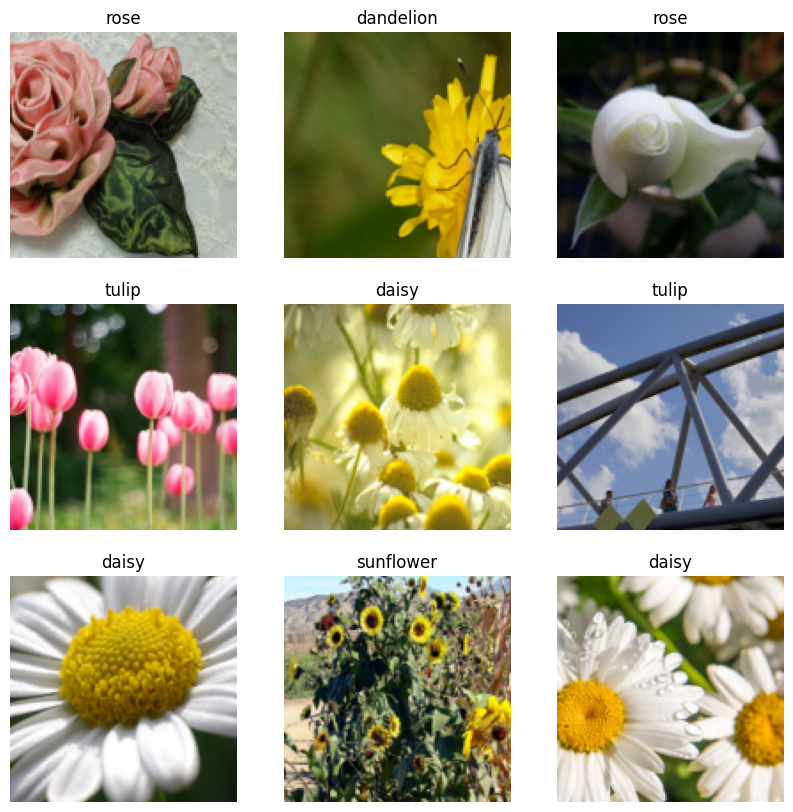

In [47]:
data.show_batch(figsize=(10,10))


In [48]:
print("Number of classes", data.c)

Number of classes 5


In [49]:
model = cnn_learner(data, resnet34, metrics=accuracy,  model_dir="/tmp/model2/")

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 40.8MB/s]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(valley=0.0012022644514217973)

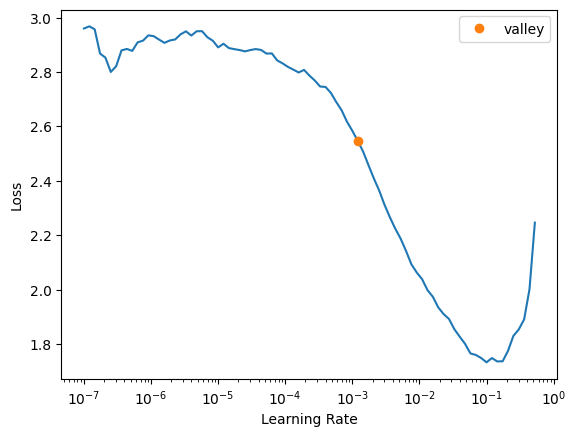

In [50]:
model.lr_find()

In [51]:
model.fit_one_cycle(2, 10e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.066831,1.018272,0.744526,05:14
1,0.679073,0.428276,0.854015,04:40


In [52]:
model.save('./flower-class.pkl')

Path('/tmp/model2/flower-class.pkl.pth')

In [59]:
model.export("model")

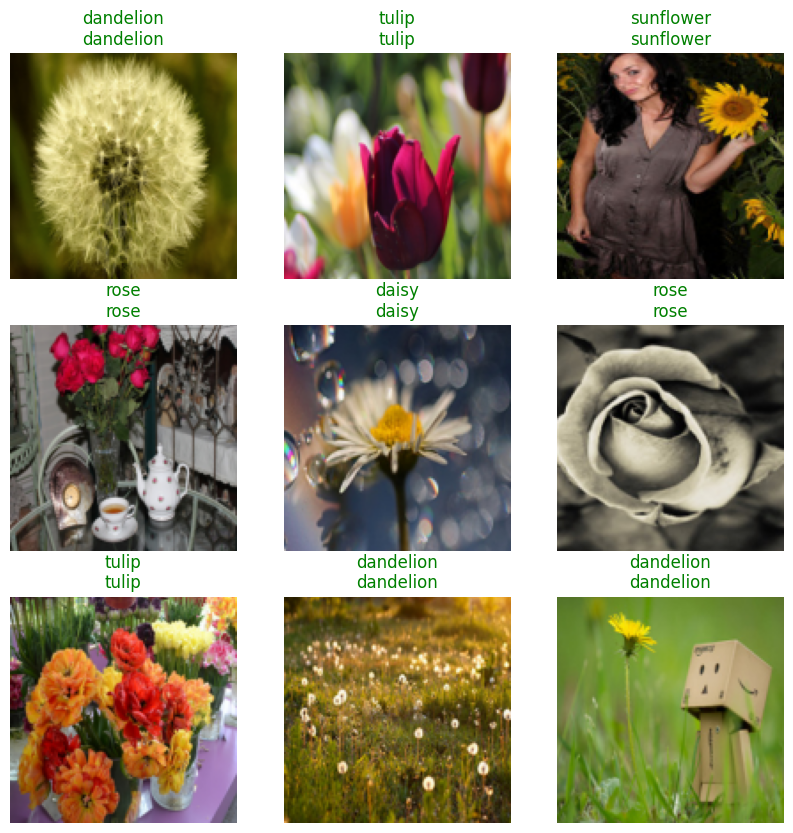

In [53]:
model.show_results(figsize=(10,10))


In [54]:
def plot_top_losses_debug(interp,idx, k=9, largest=True, **kwargs):
    if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
    if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
    else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
    k=9
    b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
    x,y,its = interp.dl._pre_show_batch(b, max_n=k)
    b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
    x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
    if its is not None:
        plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses, figsize=(20,20))

In [55]:
interpretation = ClassificationInterpretation.from_learner(model)
losses, idx = interpretation.top_losses()
#interpretation.plot_top_losses(4, figsize=(15,11))

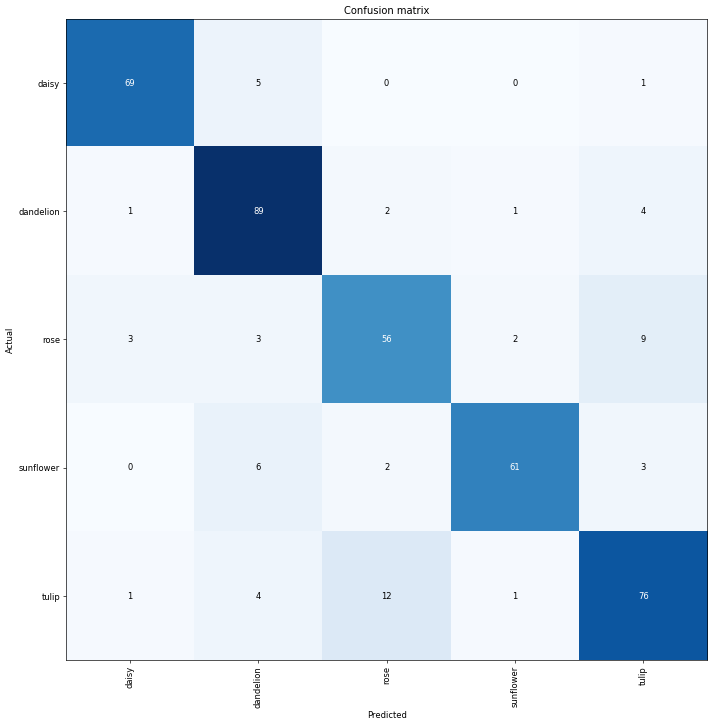

In [56]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

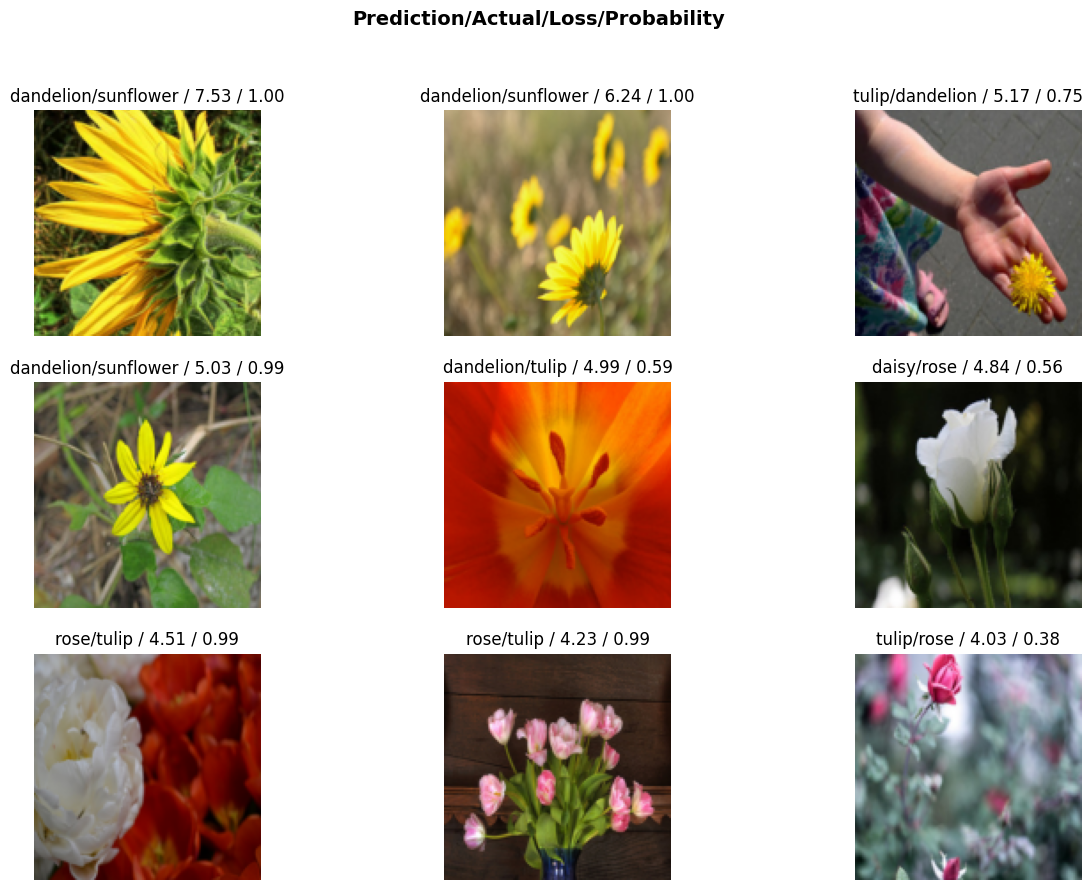

In [57]:
interpretation.plot_top_losses(9, figsize=(15,10))


In [58]:
interpretation.most_confused(min_val=2)


[('tulip', 'rose', 12),
 ('rose', 'tulip', 9),
 ('sunflower', 'dandelion', 6),
 ('daisy', 'dandelion', 5),
 ('dandelion', 'tulip', 4),
 ('tulip', 'dandelion', 4),
 ('rose', 'daisy', 3),
 ('rose', 'dandelion', 3),
 ('sunflower', 'tulip', 3),
 ('dandelion', 'rose', 2),
 ('rose', 'sunflower', 2),
 ('sunflower', 'rose', 2)]